# Building a neural net from scratch
This notebook aims to show students the inner workings of a basic neural network while at the same time iluminating some theoretical foundations that underpin machine learning in general. This work is inspired by [Trask's 'A neural network in 11 lines of Python'](https://iamtrask.github.io/2015/07/12/basic-python-network/).

## Maths & Code
This chapter explains neural networks using example code written in numpy. If you are not very familiar with python or numpy don't worry though. You can find excel implementations in the week 1 folder. Open the excel sheet and see how the python code corresponds to the formulas in Excel. You can also use the sheets to explore what exactly happens to the parameters of the network as it trains.

## NN architecture
In this exercise, we will be working on a supervised learning problem. This means we got an input matrix $X$ and an output vector $y$ and we want to train our algorithm on making predictions for $y$. Let's give the data a look:

|$X_1$|$X_2$|$X_3$|$y$|
|-|-|-|---|
|0|1|0|0|
|1|0|0|1|
|1|1|1|1|
|0|1|1|0|

Our data has three input features, $X_1$,$X_2$ and $X_3$ and one output, $y$ with all values being either 1 or 0. You can also see that we have four examples in our data and that we combined the data into one matrix by stacking horizontal vectors. You might have noticed that $X_1$ is perfectly correlated with $y$. Finding those correlations automatically is exactly the task of our neural net. In this exercise we will implement one layer neural network, which is the same as a logistic regressor.

In neural networks, the input layer is denoted as $A_0$, the first layer as $A_1$ and so on. In I will follow this notation and name the input layer $A_0$. Sinc the input layer activations are just the input, we find that:

$$A_0 = X$$

In the graphical content of this course I will denote specific features of a layer with squared brakets, like in  python array indexing. $X_1$ therfore becomes ```A0[0] ```

### A logistic regressor

![Logistic](./assets/logistic.jpg)

### Linear forward
As you can see in the image above, our neural net will consist of only one input layer and one output layer. The first the input features are multiplied with the weights $w$ and the weighted features then get summed up, together with the bias b. This is exactly what happens in [linear regression](https://en.wikipedia.org/wiki/Linear_regression), a technique you might be familiar with. In linear regression, the bias $b$ is usually denoted as $\beta_0$ while the weights are named $\beta_1, \beta_2, \beta_3...$ For convenience we are just calling $\beta_0$ $b$ and group all other weights into the weight vector $w$. $w$ and $b$ are called the parameters of the neural network. The outcome of our linear regression gets then passed into a non linear activation function, in our case the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function). This is the same as what happens in [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression). 

$$ z_1 = A_0.W_1 + b$$

### The sigmoid activation function

If we had a linear activation function, the output would simply be a weighted sum of our input features. Through non-linear activation functions we can model much more complex functions. In fact, it has been shown that neural nets can model _any_ function, as long as we make them big enough. Our sigmoid function has the formula:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$
And looks like this:
![Sigmoid function](/assets/Logistic-curve.svg)

We can define the Python function:
```python
# sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))
```

### Initializing weights

Now let's go backward through our perceptron. Before we can work with the weights, we have to initialize them.
```python
# initialize weights randomly with mean 0
W1 = 2*np.random.random((3,1)) - 1
```
This creates a 3 by 1 weight matrix, mapping our three input features to our one output. It is important to initialize the weights randomly and not just set them all to zero for the sake of symmetry breaking. If all the weights where the same, then they would never be different from each other, and our neural net could not model any complex functions.

### A full forward pass

With all the elements in place, we can now obtain predictions from our network with a forward pass.

1. We do a linear step:
$$ z_1 = A_0.W_1 + b$$
2. We pass the linear product through the activation function
$$A_1 = \sigma(z_1)$$

In [5]:
import numpy as np
#Seed the random function to ensure that we always get the same result
np.random.seed(1)
# sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))
    
#set up w0
W1 = 2*np.random.random((3,1)) - 1

#define X
X = np.array([[0,1,0],
              [1,0,0],
              [1,1,1],
              [0,1,1]])

#define y
y = np.array([[0,1,1,0]])
#do the linear step
z1 = np.dot(X,W1)
#pass the linear step through the activation function
A1 = sigmoid(z1)
#see what we got
print(A1)

[[ 0.60841366]
 [ 0.45860596]
 [ 0.3262757 ]
 [ 0.36375058]]


## Measuring losses
 
 That does not look like $y$ at all! That is just random numbers! We now have to modify the weights so that we arrive at better predictions.
 In order to arrive at better predictions, we first have to quantify how badly we did. In classification the metric used is the [cross-entropy loss](https://en.wikipedia.org/wiki/Cross_entropy), sometimes also called logistic loss or log loss. It is calculated as follows:
 
 $$L(w) = -\frac{1}{m} \sum_{i=0}^m [y_i * \log \hat y_i  +  (1-y_i)*\log(1-\hat y_i)]$$
 
 Let's go through this step by step.
 
 1. $L(w)$ is the loss function given the weights $w$ that where used to obtain the prediction $\hat y_i$
 2. $-\frac{1}{m} \sum_{i=0}^m$ The loss over a batch of m examples is the average loss of all examples. We have factored a - out of the sum and moved it in front of the equation.
 3. $y_i * \log \hat y_i$ This part of the loss only comes into play if the true value, $y_i$ is 1. If $y_i$ is 1, we want $\hat y_i$ to be as close to 1 as possible, to achieve a low loss.
 4. $(1-y_i)*\log(1-\hat y_i)$ This part of the loss comes into play if $y_i$ is 0. If so, we want $\hat y_i$ to be close to 0 as well.
 
 Consider the following example: We have only one sample so, 
 $m = 1$, the true value $y_i = 1$ and the the prediction $\hat y_i = 0.01$. $\hat y_i$ can be interpreted as the probability that $y_i = 1$ given $X_i$, or $P(y_i = 1 | X_i)$ in math terms. It will never be zero since the probability of $y_i = 1$ will never be zero, only very small. Here, our algorithm has given $y_i = 1$ only a 1% chance. In the case above our loss can be calculated as: 
 
 $$L(w) = -\frac{1}{1} \sum_{i=0}^1 [1 * \log (0.01)  +  (1-1)*\log(1-0)]$$
  $$L(w) = -[-4.6051  +  0]$$
  $$L(w) = 4.6051$$
  
  This is quite a high loss, let's see what would have happened if $\hat y_i = 0.99$, meaning the algorithm would have given $y_i = 1$ a 99% chance.
  
  $$L(w) = -\frac{1}{1} \sum_{i=0}^1 [1 * \log (0.99)  +  (1-1)*\log(1-0.99)]$$
   $$L(w) = -[-0.01  +  0]$$
   $$L(w) = 0.01$$
   
Much better! As an exercise, calculate what the loss would be if the algorithm had $\hat y_i = 0.99$ while $y_i = 0$. In the next section we will see how our algorithm can arrive at lower losses. Through a method called gradient descent.

## Gradient descent
 
![Gradient Descent](./assets/Gradient_descent.jpg)
 
Now that we have a good measure for our loss, how do we decrease it. This is a classic minimization task. We want to find a value for $w$ that minimizes $L(w)$. In linear regression we know how to solve the loss function for a value of $w$ that minimizes the squared loss function. For neural networks, this is sadly not possible. But what we can do instead is follow the gradient through a method called gradient descent.

### Intuition
Imagine you are on a mountain forrest on a hike. You have lost the track and are now in the woods trying to find home to the valley. Since there are so many trees, you can not see the valley, you can only see the ground under you. How would you find your way down? One sensible approach would be to follow the slope of the mountain. Where the slope goes downwards, you go. This is the same as a gradient descent algorithm does. The loss function is the mountain and to get to a low loss, the algorithm follows the slope, that is the derivative, of the loss function. When we walk down the mountain, we are updating our location coordinates. The algorithm updates the parameters of the neural network.

![Stanford Gradient Descent Image](./assets/grad.png)

As you can see in the image above, there is a potential problem of the algorithm converging in a local optima. That is, a point lower than all surrounding points, but not the lowest point in the loss function. In practice we find this not to be a huge concern. The parameter space is very high dimensional (there are many parameters to be updated), so a point being lower than _all_ surrounding points is quite rare.

### Mathematical representation
Gradient descent updates a parameter by adding the negative gradient multiplied with the learning rate alpha. So for a parameter $a$, the update rule is:
$$a := a - \alpha * \frac{dL(w)}{da}$$
The symbol $:=$ denotes a value assignment. This is not an equation, therefore we do not use $=$. The learning rate $alpha$ is a so called hyper parameter, that ensure that the update is not too big and the algorithm does not 'jump over' the minimum. We will learn more about the learning rate and hyper parameters in the next chapter, so in this example I will just leave it out.

To better understand why the parameters are updated with the _inverse_ of the gradient, take a look at this image.
![Gradient Descent With Gradients](./assets/gradient_descent_trask.png)
As you can see the gradient is positive when the slope is upwards facing. To get to a lower point on the cost function we have to go 'backwards'. The steeper the slope, the more we have to move.

### Backpropagation
Before we can start updating our weights, we have to calculate the derivative of course. In this case, we want the derivative of the total loss $L(w)$ with respect to the weight vector $w$. To get there, we have to use the chain rule:

![Chain rule](./assets/forward_backward_pass.jpg)

Calculating the derivative through what is called a computational graph was a big problem for a long time so it can be surprising that the solution is essentially the humble chain rule from high school. If you want to learn more about this topic I recommend [colah's blog post](http://colah.github.io/posts/2015-08-Backprop/).

To keep things easy in this class I will simplify the derivatives and let $da$ denote the derivative of $L(w)$ with respect to $a$, whatever it may be.

In code, the backpropagation and gradient descent update looks like this:

```python
#Calculate derivative of L(w) with respect to z0
dz1 = log_loss_derivative(y=y,y_hat=A1)

#Calculate derivative of L(w) with respect to w0
dW1 = 1/m * np.dot(A0,dz1)

#Calculate derivative of L(w) with respect to b0
db1 = 1/m * np.sum(dz1,axis=0,keepdims=True)

#Update w0 accoarding to gradient descent algorithm
W1 -= dW1

#Update b0 accoarding to gradient descent algorithm
b0 -= db1
```

## The optimization algorithm
Now, let's put all of this together.

In [19]:
import numpy as np
#Seed the random function to ensure that we always get the same result
np.random.seed(1)
#Variable definition
#set up w0
W1 = 2*np.random.random((3,1)) - 1

#define X
X = np.array([[0,1,0],
              [1,0,0],
              [1,1,1],
              [0,1,1]])
#define y
y = np.array([[0],
              [1],
              [1],
              [0]])

#b may be 0
b1 = 0
m = X.shape[0]
A0 = X

In [20]:
# sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

#Log Loss function
def log_loss(y,y_hat):
    N = y.shape[0]
    l = -1/N * np.sum(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))
    return l

def log_loss_derivative(y,y_hat):
    return (y_hat-y)

In [21]:
losses = []
for i in range(22):
    #do the linear step
    z1 = A0.dot(W1) + b1
    #pass the linear step through the activation function
    A1 = sigmoid(z1)
    
    #Calculate loss
    loss = log_loss(y=y,y_hat=A1)
  
    #we use this to keep track of losses over time
    losses.append(loss)

    #Calculate derivative of L(w) with respect to z0
    dz1 = log_loss_derivative(y=y,y_hat=A1)
    
    #Calculate derivative of L(w) with respect to w0
    dW1 = 1/m * np.dot(A0.T,dz1)
    
    #Calculate derivative of L(w) with respect to b0
    db1 = 1/m * np.sum(dz1,axis=0,keepdims=True)
    
    #Update w0 accoarding to gradient descent algorithm
    #To keep things easy we will ignore the learning rate alpha for now, it will be covered in the next chapter
    W1 -= dW1

    #Update b0 accoarding to gradient descent algorithm
    b1 -= db1

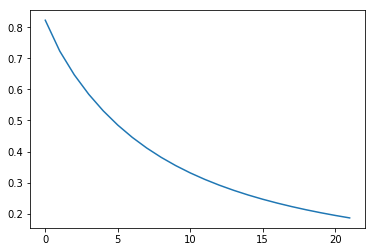

In [22]:
#Plot losses over time
#As you can see our algorithm does quite well and quickly reduces losses
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

## Summary
In this chapter you have built your first (very simple) neural network from scratch. You have seen some of the most important tools like backpropagation and gradient descent. In the next chapter we will build a bigger network with more layers. You will also learn about your first hyper parameter, the learning rate $\alpha$.
I hope you have learned some key lessons in this chapter:
### Key take aways
1. A NN makes predictions through matrix multiplication and activation functions.
2. A NN learns by updating its parameters by inverse gradients.